<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/1_gluoncv_finetune/TRAIN-gluon-ssd_512_vgg16_atrous_voc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/1_gluoncv_finetune/installation
     
 - Select the right requirements file and run
 
     - cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/1_gluoncv_finetune/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install


# For Local systems and cloud select the right CUDA version
# !cd Monk_Object_Detection/1_gluoncv_finetune/installation && cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

## Dataset Directory Structure

    Parent_Directory (root)
          |
          |-----------Images (img_dir)
          |              |
          |              |------------------img1.jpg
          |              |------------------img2.jpg
          |              |------------------.........(and so on)
          |
          |
          |-----------train_labels.csv (anno_file)
          
          
## Annotation file format

           | Id         | Labels                                 |
           | img1.jpg   | x1 y1 x2 y2 label1 x1 y1 x2 y2 label2  |
           
- Labels:  xmin ymin xmax ymax label
- xmin, ymin - top left corner of bounding box
- xmax, ymax - bottom right corner of bounding box

# About the Network

1. Blog 1 on VGG Network - https://towardsdatascience.com/vgg-neural-networks-the-next-step-after-alexnet-3f91fa9ffe2c

2. Blog 2 on VGG Network - https://medium.com/coinmonks/paper-review-of-vggnet-1st-runner-up-of-ilsvlc-2014-image-classification-d02355543a11

3. Blog 1 on SSD - https://towardsdatascience.com/review-ssd-single-shot-detector-object-detection-851a94607d11

4. Blog 2 on SSD-512 - https://medium.com/@jonathan_hui/ssd-object-detection-single-shot-multibox-detector-for-real-time-processing-9bd8deac0e06

5. Blog 3 on SSD - https://towardsdatascience.com/understanding-ssd-multibox-real-time-object-detection-in-deep-learning-495ef744fab

6. Blog on Atrous Convolution - https://towardsdatascience.com/review-deeplabv1-deeplabv2-atrous-convolution-semantic-segmentation-b51c5fbde92d

7. Reference Tutorial - https://gluon.mxnet.io/chapter08_computer-vision/object-detection.html

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/1_gluoncv_finetune/lib/");

In [2]:
from detector_prototype import Detector

In [3]:
gtf = Detector();

# Sample Dataset Credits

- credits: https://github.com/experiencor/kangaroo

In [4]:
root = "Monk_Object_Detection/example_notebooks/sample_dataset/kangaroo/";                         
img_dir = "Images/";                                                     
anno_file = "train_labels.csv";
batch_size=2;

In [5]:
gtf.Dataset(root, img_dir, anno_file, batch_size=batch_size);

In [6]:
pretrained = True;         
gpu=True;
model_name = "ssd_512_vgg16_atrous_voc";  

In [7]:
gtf.Model(model_name, use_pretrained=pretrained, use_gpu=gpu);

In [8]:
gtf.Set_Learning_Rate(0.001);

In [9]:
epochs=10;
params_file = "saved_model.params";

In [10]:
gtf.Train(epochs, params_file);

[Epoch 0][Batch 0], Speed: 0.337 samples/sec, CrossEntropy=10.561, SmoothL1=1.598
[Epoch 0][Batch 20], Speed: 6.892 samples/sec, CrossEntropy=5.034, SmoothL1=1.242
[Epoch 0][Batch 40], Speed: 8.105 samples/sec, CrossEntropy=4.035, SmoothL1=1.399
[Epoch 0][Batch 60], Speed: 3.207 samples/sec, CrossEntropy=3.599, SmoothL1=1.376
[Epoch 0][Batch 80], Speed: 4.575 samples/sec, CrossEntropy=3.372, SmoothL1=1.367
[Epoch 1][Batch 0], Speed: 4.681 samples/sec, CrossEntropy=2.745, SmoothL1=1.579
[Epoch 1][Batch 20], Speed: 5.719 samples/sec, CrossEntropy=2.513, SmoothL1=1.374
[Epoch 1][Batch 40], Speed: 8.790 samples/sec, CrossEntropy=2.437, SmoothL1=1.175
[Epoch 1][Batch 60], Speed: 4.694 samples/sec, CrossEntropy=2.373, SmoothL1=1.084
[Epoch 1][Batch 80], Speed: 7.676 samples/sec, CrossEntropy=2.331, SmoothL1=1.064
[Epoch 2][Batch 0], Speed: 8.211 samples/sec, CrossEntropy=2.557, SmoothL1=1.402
[Epoch 2][Batch 20], Speed: 7.427 samples/sec, CrossEntropy=2.223, SmoothL1=0.937
[Epoch 2][Batch 40

# Running Inference

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/1_gluoncv_finetune/lib/");

In [11]:
from inference_prototype import Infer

In [12]:
model_name = "ssd_512_vgg16_atrous_voc";
params_file = "saved_model.params";
class_list = ["kangaroo"];

In [13]:
gtf = Infer(model_name, params_file, class_list, use_gpu=True);

In [20]:
img_name = "Monk_Object_Detection/example_notebooks/sample_dataset/kangaroo/test/kg4.jpeg"; 
visualize = True;
thresh = 0.4;

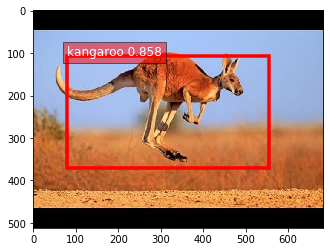

In [21]:
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

# Author - Tessellate Imaging - https://www.tessellateimaging.com/

# Monk Library - https://github.com/Tessellate-Imaging/monk_v1

    Monk is an opensource low-code tool for computer vision and deep learning


## Monk features
   - low-code
   - unified wrapper over major deep learning framework - keras, pytorch, gluoncv
   - syntax invariant wrapper

## Enables

    - to create, manage and version control deep learning experiments
    - to compare experiments across training metrics
    - to quickly find best hyper-parameters

## At present it only supports transfer learning, but we are working each day to incorporate

    - GUI based custom model creation
    - various object detection and segmentation algorithms
    - deployment pipelines to cloud and local platforms
    - acceleration libraries such as TensorRT
    - preprocessing and post processing libraries


## To contribute to Monk AI or Monk Object Detection repository raise an issue in the git-repo or dm us on linkedin

    - Abhishek - https://www.linkedin.com/in/abhishek-kumar-annamraju/
    - Akash - https://www.linkedin.com/in/akashdeepsingh01/

